<a href="https://colab.research.google.com/github/GustavoMeloAI/Regression-model/blob/main/Case_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

     |████████████████████████████████| 266kB 25.0MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 81kB 8.8MB/s 
     |████████████████████████████████| 14.2MB 181kB/s 
     |████████████████████████████████| 6.8MB 37.2MB/s 
     |████████████████████████████████| 2.0MB 37.1MB/s 
     |████████████████████████████████| 1.7MB 30.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.4MB 33.7MB/s 
     |████████████████████████████████| 112kB 43.9MB/s 
     |████████████████████████████████| 256kB 44.0MB/s 
     |████████████████████████████████| 276kB 45.2MB/s 
     |████████████████████████████████| 174kB 44.8MB/s 
     |████████████████████████████████| 1.2MB 33.3MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 645kB 32.9MB/

In [ ]:
import pandas as pd

In [ ]:
base_case = pd.read_csv('/content/case.csv',delimiter=';') 

In [ ]:
base_case

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
0,3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,1093,758,92,304,2501.0,9325150
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,2040,2490,827,2506,931.0,5888330
2,3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,644,522,77,254,2391.0,8742000
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,2007,1341,1986,114,178,393,517,945,584,137,286,3727.0,9122260
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,12272,7157,8190,0,0,1089,2821,5110,5422,1073,3261,1380.0,5530200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3304557062,Vila Kosmos,Rio de Janeiro,RJ,18791,1802,921,1442,1462,2500,3944,2920,3800,0,259,774,1363,1923,1379,190,405,2316.0,9014460
156,3304557093,Vila Militar,Rio de Janeiro,RJ,13556,1888,787,1042,982,2542,2908,1528,1879,0,219,714,828,1051,1012,116,465,2416.0,8497310
157,3304557091,Vila Valqueire,Rio de Janeiro,RJ,33190,3166,1619,2255,2326,4752,7183,4950,6939,0,906,2866,2241,2982,1200,360,772,3189.0,11270420
158,3304557065,Vista Alegre,Rio de Janeiro,RJ,8867,724,387,580,565,1205,1812,1474,2120,0,87,556,836,940,484,75,214,2418.0,9218750


In [ ]:
base_case.describe()

,codigo,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
count,1.600000e+02,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,154.000000,1.600000e+02
mean,3.304557e+09,42654.350000,5329.06250,2484.443750,3272.156250,3349.381250,6584.475000,8826.862500,5332.262500,7475.706250,388.475000,608.268750,1871.562500,2385.075000,3539.850000,3030.806250,568.37500,1821.612500,3608.071429,8.761600e+06
std,4.633213e+01,64262.949072,10816.19977,4948.827166,5752.156303,5601.893201,9049.895783,11536.276416,7986.261929,10258.307743,1403.605232,1535.237669,2973.530791,2779.071565,4324.539462,4003.047836,823.92034,2292.079295,6091.865305,4.382106e+06
min,3.304557e+09,173.000000,33.00000,13.000000,22.000000,17.000000,28.000000,38.000000,10.000000,12.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.00000,2.000000,654.000000,2.465100e+05
25%,3.304557e+09,13362.750000,1512.75000,690.750000,945.000000,994.750000,2131.250000,2900.750000,1598.750000,2118.250000,0.000000,0.000000,391.500000,716.000000,1088.750000,789.750000,117.75000,431.500000,1486.000000,7.112785e+06
50%,3.304557e+09,26076.000000,3111.50000,1434.000000,2015.000000,2142.500000,4170.500000,5657.000000,3371.500000,4575.500000,0.000000,107.500000,848.000000,1536.000000,2394.500000,1861.500000,327.50000,1042.500000,1915.500000,8.242285e+06
75%,3.304557e+09,46504.500000,5622.25000,2621.500000,3448.750000,3451.750000,7145.250000,9586.750000,6333.250000,9196.000000,1.000000,430.500000,1962.500000,3065.750000,4203.000000,3652.500000,694.00000,2138.250000,2954.500000,9.343208e+06
max,3.304557e+09,667603.000000,122578.00000,55935.000000,62342.000000,60567.000000,86116.000000,105316.000000,83341.000000,91408.000000,13408.000000,11668.000000,19350.000000,21237.000000,33111.000000,25779.000000,4956.00000,14833.000000,63887.000000,2.915612e+07


In [ ]:
# O maior faturamento foi na Barra da tijuca onde tem uma pop grande entre 35a49 anos e maiores de 60 anos com muitos domicilios A1,A2 e B1
base_case[base_case['faturamento'] == 2.915612e+07]

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
9,3304557131,Barra Da Tijuca,Rio de Janeiro,RJ,139761,13038,5225,7432,8627,21914,32089,21058,30378,13408,11668,14820,5205,3437,1841,0,3897,18084.0,29156120


In [ ]:
base_case.shape

(160, 23)

In [ ]:
from pycaret.regression import *

In [ ]:
exp_reg = setup(data = base_case, target = 'faturamento', session_id=123,
                  normalize = True, transformation = True, transform_target = True, 
                  combine_rare_levels = True, rare_level_threshold = 0.05,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  log_experiment = True, experiment_name = 'teste')

,Description,Value
0,session_id,123
1,Target,faturamento
2,Original Data,"(160, 23)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(111, 10)"


In [ ]:
top3 = compare_models(exclude = ['ransac'],n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,7.494526e+05,1.954434e+12,1.132480e+06,0.8936,0.2229,0.1939,0.258
rf,Random Forest Regressor,8.398347e+05,2.157449e+12,1.191208e+06,0.8809,0.2342,0.2041,0.309
gbr,Gradient Boosting Regressor,8.565798e+05,2.438957e+12,1.231972e+06,0.8753,0.2361,0.2234,0.052
ada,AdaBoost Regressor,1.025826e+06,2.936369e+12,1.402026e+06,0.8357,0.2498,0.2499,0.077
dt,Decision Tree Regressor,1.028386e+06,3.757967e+12,1.518502e+06,0.7867,0.2627,0.2590,0.017
knn,K Neighbors Regressor,1.164043e+06,4.230407e+12,1.748907e+06,0.7570,0.3525,0.3549,0.065
huber,Huber Regressor,1.363551e+06,5.203622e+12,2.015597e+06,0.7169,0.4087,0.5020,0.022
br,Bayesian Ridge,1.562893e+06,5.379314e+12,2.092151e+06,0.6665,0.3984,0.4376,0.016
ridge,Ridge Regression,1.577860e+06,5.394920e+12,2.113246e+06,0.6546,0.4012,0.4405,0.017
lr,Linear Regression,1.596620e+06,5.438126e+12,2.136998e+06,0.6430,0.4047,0.4448,0.281


In [ ]:
print(top3)

[PowerTransformedTargetRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                powe...
                                regressor=ExtraTreesRegressor(bootstrap=False,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                            

In [ ]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.678248e+05,3.592996e+11,5.994161e+05,0.9625,0.2071,0.1466
1,1.958976e+06,1.117342e+13,3.342667e+06,0.8136,0.6610,0.7691
2,6.531349e+05,6.333207e+11,7.958145e+05,0.9439,0.1204,0.0982
3,2.105166e+05,1.040374e+11,3.225484e+05,0.9929,0.0233,0.0178
4,9.209606e+05,2.408086e+12,1.551801e+06,0.9237,0.3898,0.3005
5,5.592569e+05,7.757415e+11,8.807619e+05,0.8819,0.0970,0.0574
6,7.836252e+05,1.988648e+12,1.410194e+06,0.8681,0.3870,0.2952
7,6.103978e+05,5.544359e+11,7.446045e+05,0.9240,0.1351,0.1027
8,5.011248e+05,3.280995e+11,5.727997e+05,0.9788,0.0639,0.0553
9,8.287084e+05,1.219250e+12,1.104197e+06,0.6463,0.1443,0.0958


In [ ]:
print(et)

PowerTransformedTargetRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                powe...
                                regressor=ExtraTreesRegressor(bootstrap=False,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                             

In [ ]:
tuned_et = tune_model(et) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,9.032707e+05,2.128316e+12,1.458875e+06,0.7780,0.6241,0.6426
1,2.754171e+06,2.288740e+13,4.784078e+06,0.6183,0.7199,0.9251
2,6.722109e+05,6.534227e+11,8.083457e+05,0.9421,0.1197,0.1014
3,3.784856e+05,3.549251e+11,5.957559e+05,0.9757,0.0452,0.0359
4,1.411339e+06,4.380099e+12,2.092869e+06,0.8613,0.6050,0.6407
5,6.933130e+05,1.302330e+12,1.141197e+06,0.8018,0.1298,0.0702
6,7.741089e+05,1.486059e+12,1.219040e+06,0.9014,0.5975,0.6156
7,6.770792e+05,8.678891e+11,9.316057e+05,0.8811,0.1629,0.1173
8,5.719373e+05,6.232196e+11,7.894426e+05,0.9598,0.0746,0.0573
9,9.302171e+05,1.512440e+12,1.229813e+06,0.5612,0.1656,0.1065


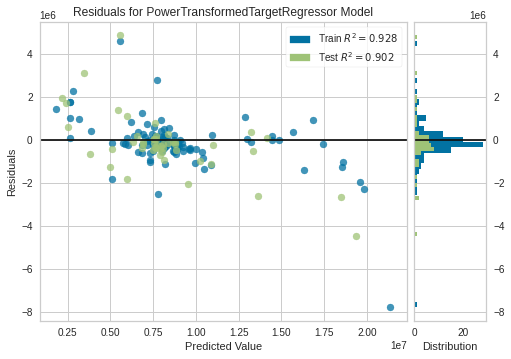

In [ ]:
plot_model(tuned_et)

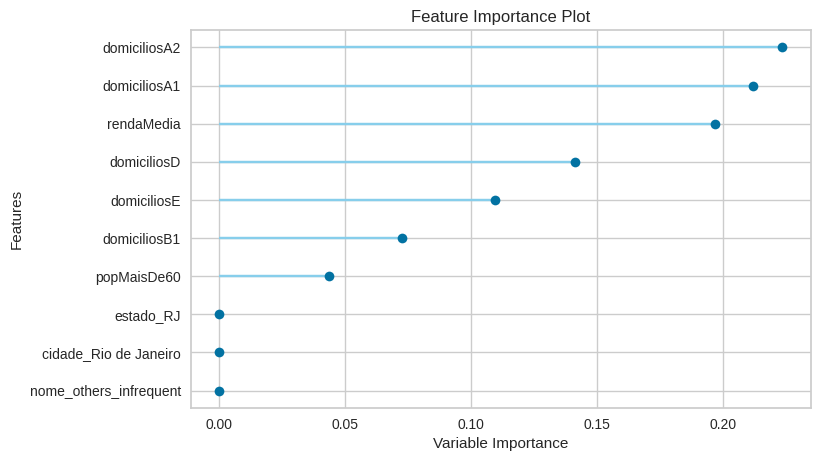

In [ ]:
plot_model(tuned_et, plot='feature')

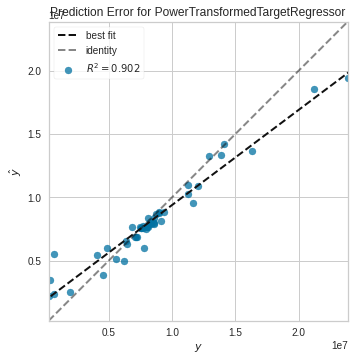

In [ ]:
plot_model(tuned_et, plot = 'error')

In [ ]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,870581.1669,1.917766e+12,1.384834e+06,0.902,0.5774,0.6025


,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosD,domiciliosE,rendaMedia,nome_others_infrequent,cidade_Rio de Janeiro,estado_RJ,faturamento,Label
0,0.814776,-0.533902,-0.925757,-0.776639,1.403916,1.548753,-1.225082,1.0,1.0,1.0,4507230.0,3.825083e+06
1,-0.638741,-0.533902,-0.925757,-0.657124,-0.308656,-0.386038,-0.632824,1.0,1.0,1.0,7982060.0,7.728159e+06
2,-1.299448,-0.533902,-0.521783,-0.732197,-1.318631,-1.306710,0.275179,1.0,1.0,1.0,8936400.0,8.809830e+06
3,1.148297,-0.533902,-0.925757,-0.459906,2.032891,2.019270,-1.265692,1.0,1.0,1.0,246510.0,2.194208e+06
4,-1.821566,-0.533902,-0.910570,-1.418921,-1.499912,-1.590949,-0.351259,1.0,1.0,1.0,8551820.0,8.396281e+06
5,1.439816,1.730141,1.837935,1.671206,-0.807281,0.273757,1.193425,1.0,1.0,1.0,16268560.0,1.363975e+07
6,-0.950677,-0.533902,-0.925757,-1.319772,0.217380,0.248399,-1.345659,1.0,1.0,1.0,7115910.0,6.891896e+06
7,-1.655852,-0.533902,-0.925757,-1.420781,-1.231031,-1.222037,-1.121828,1.0,1.0,1.0,8286770.0,7.983226e+06
8,2.575777,-0.533902,1.688891,1.993613,2.234488,2.274356,-0.426202,1.0,1.0,1.0,696450.0,5.537185e+06
9,1.050241,-0.533902,0.409537,1.231563,0.928209,0.545646,-0.123784,1.0,1.0,1.0,8256080.0,8.055755e+06


In [ ]:
final_et = finalize_model(tuned_et)

In [ ]:
print(final_et)

PowerTransformedTargetRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                                max_depth=8, max_features='sqrt',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0001,
                                min_impurity_split=None, min_samples_leaf=2,
                                min_samples_split=5,
                                min_weight_fraction_leaf=0.0, n_estimators=240,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                powe...
                                regressor=ExtraTreesRegressor(bootstrap=False,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=8,
                                

In [ ]:
#aumento do R2 ao usar a variável treinada 
predict_model(final_et);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,586175.8909,8.250525e+11,908324.0203,0.9578,0.4279,0.3312


In [ ]:
# Necessário dados não utilizados , para fazer próximas previsões

In [ ]:
save_model(final_et,'Final et Model 10Jun2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=['codigo'],
                                       ml_usecase='regression',
                                       numerical_features=[],
                                       target='faturamento', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nume...
                                                                                ccp_alpha=0.0,
                                                                                criterion='mse',
                                                                                ma

In [ ]:
!mlflow ui

[2021-06-19 02:38:42 +0000] [3456] [INFO] Starting gunicorn 20.1.0
[2021-06-19 02:38:42 +0000] [3456] [INFO] Listening at: http://127.0.0.1:5000 (3456)
[2021-06-19 02:38:42 +0000] [3456] [INFO] Using worker: sync
[2021-06-19 02:38:42 +0000] [3459] [INFO] Booting worker with pid: 3459
